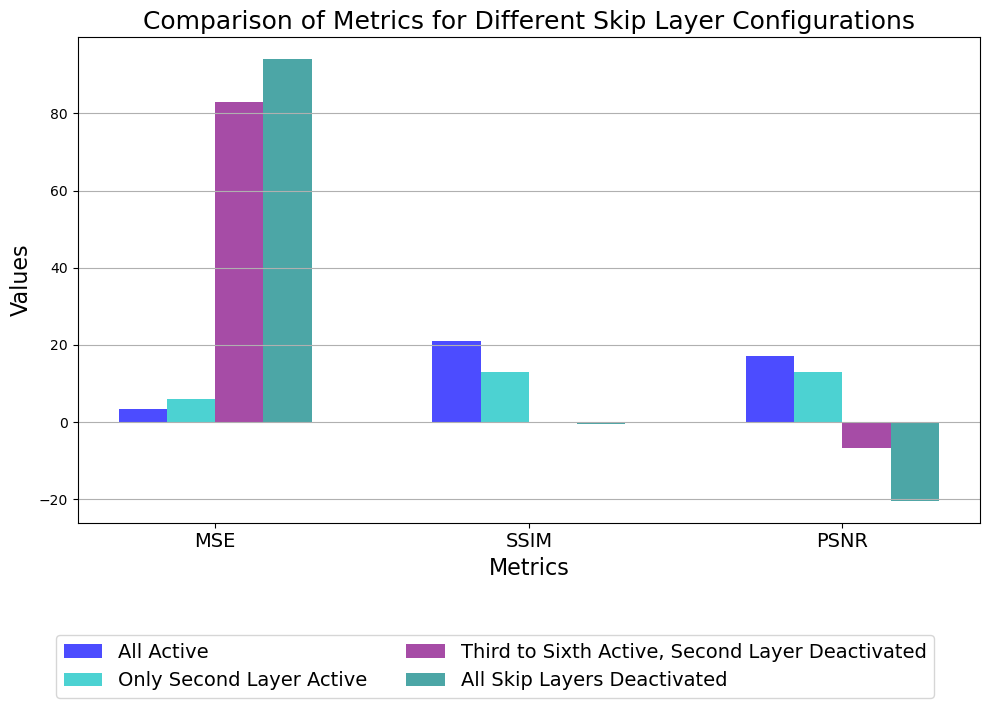

In [24]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['MSE', 'SSIM', 'PSNR']
skip_configs = ['All Active', 'Only Second Layer Active', 'Third to Sixth Active, Second Layer Deactivated', 'All Skip Layers Deactivated']
data = {
    'MSE': [3.5, 6, 83, 94],
    'SSIM': [21.10, 13.07, -0.26, -0.48],
    'PSNR': [17.15, 12.91, -6.62, -20.38],
}

num_metrics = len(metrics)
num_configs = len(skip_configs)
bar_width = 0.2
group_width = num_configs * bar_width + 0.5 

fig, ax = plt.subplots(figsize=(10, 6)) 

colors = ['Blue', 'c', 'Purple', 'Teal']

positions = np.arange(num_metrics) * group_width

for i, config in enumerate(skip_configs):
    bar_positions = positions + i * bar_width
    ax.bar(bar_positions, [data[metric][i] for metric in metrics], bar_width, label=config, color=colors[i], alpha=0.7)

ax.set_xticks(positions + (num_configs - 1) * bar_width / 2)
ax.set_xticklabels(metrics, fontsize=14)  
ax.set_xlabel('Metrics', fontsize=16)  
ax.set_ylabel('Values', fontsize=16)  
ax.set_title('Comparison of Metrics for Different Skip Layer Configurations', fontsize=18)  

ax.grid(axis='y')

fig.legend(skip_configs, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=14)  

plt.tight_layout()
plt.show()


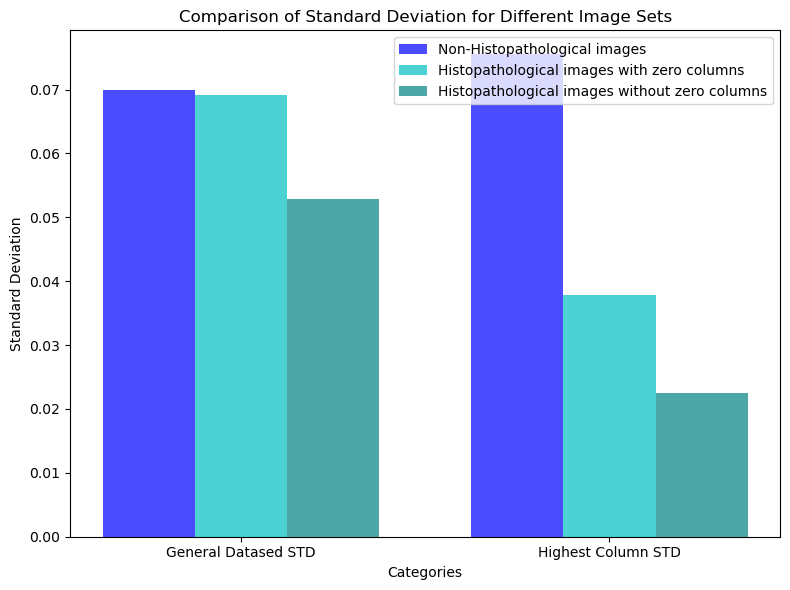

In [21]:
import matplotlib.pyplot as plt

categories = ['General Datased STD', 'Highest Column STD']
diverse_images = [0.0699, 0.0755]
autoencoder_with_zeros = [0.0691, 0.0379]
autoencoder_without_zeros = [0.0529, 0.0225]

num_categories = len(categories)
bar_width = 0.25
index = range(num_categories)

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(index, diverse_images, bar_width, label='Non-Histopathological images', color='b', alpha=0.7)
ax.bar([i + bar_width for i in index], autoencoder_with_zeros, bar_width, label='Histopathological images with zero columns', color='c', alpha=0.7)
ax.bar([i + 2*bar_width for i in index], autoencoder_without_zeros, bar_width, label='Histopathological images without zero columns', color='Teal', alpha=0.7)

ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(categories)
ax.set_xlabel('Categories')
ax.set_ylabel('Standard Deviation')
ax.set_title('Comparison of Standard Deviation for Different Image Sets')

ax.legend()

plt.tight_layout()
plt.show()

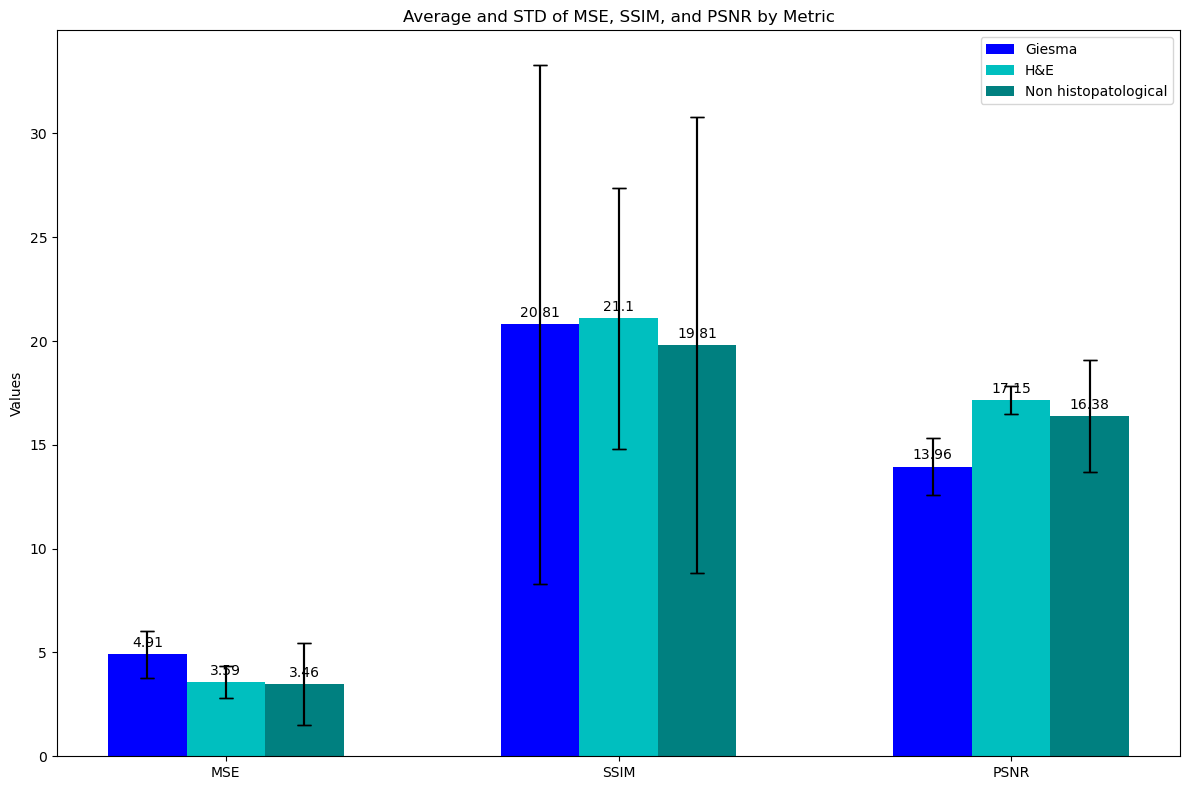

In [36]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['MSE', 'SSIM', 'PSNR']
categories = ['Giesma', 'H&E', 'Non histopatological']

average_values = [
    [4.9127068, 3.5851665, 3.4613874], 
    [20.8060309, 21.098015, 19.8079873],   
    [13.95635449, 17.15196524, 16.38112235]   
]

std_values = [
    [1.1431, 0.7867, 1.9768],  
    [12.4936, 6.278, 11.0015],   
    [1.375115, 0.682206, 2.691531]   
]

x = np.arange(len(metrics))  
width = 0.2  
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['Blue', 'c', 'Teal']

# plot for each category within each metric
for i in range(len(categories)):
    avg = [average_values[j][i] for j in range(len(metrics))]
    std = [std_values[j][i] for j in range(len(metrics))]
    ax.bar(x + i * width - width, avg, width, label=categories[i], yerr=std, capsize=5, color=colors[i])

#add labels and tables
ax.set_ylabel('Values')
ax.set_title('Average and STD of MSE, SSIM, and PSNR by Metric')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for i in range(len(categories)):
    avg = [average_values[j][i] for j in range(len(metrics))]
    std = [std_values[j][i] for j in range(len(metrics))]
    rects = ax.bar(x + i * width - width, avg, width, yerr=std, capsize=5, color=colors[i])
    autolabel(rects)

fig.tight_layout()

plt.show()
